<img src="headerimg.png">

<a id = 'TOC'> </a>
# Table Of Contents

### 1. [Question Formulation](#1)

### 2. [Data Exploration and Analysis](#2)

### 3. [Data Preparation](#3)
* [3.1 Filtering Data & Sports Categoriztion](#3.1)
* [3.2 Partitioning and Creating Male and Female Data Sets/Frames](#3.2)
* [3.3 Creation of First Dataset malesportsdict and femalesportsdict](#3.3)
* [3.4 Creation of Second Dataset maleagesdf and femaleages df](#3.4)
* [3.5 Creation of Third Dataset(s) (Sport Categorized)](#3.5)
* [3.6 Final Data Preparations for Data Science/Machine Learning Phase](#3.6)

### 4. [Data Science and Machine Learning](#4)
* [4.1 Pair Plot and K-Means on Categories of Sports (male)](#4.1)
* [4.2 Pair Plot and K-Means on Categories of Sports (female)](#4.2)

### 5. [DBSCAN](#5)
* [5.1 DBSCAN Clustering Algorithm (male)](#5.1)
* [5.2 DBSCAN Clustering Algorithm (female)](#5.2)

### 6. [Findings and Comparisons](#6)
* [6.1 Comparison of Plots - Results of Clustering](#6.1)
* [6.2 Answers to Main Questions and More Questions](#6.2)
* [6.3 Female Data Lacking - Why is the data for the female set so erratic?](#6.3)
* [6.4 Data Visualization for Female Participation in the Olympics](#6.4)
* [6.5 What is the reason for the poor Olympics Participation for Females?](#6.5)

### 7. [Conclusion and Final Findings](#7)

<a id = '1'> </a>
# <center> Question Formulation

We decided to do based on the Olympics data set. Along these lines, the idea came up that outstanding performance (among many things) is something the Olympics stands for.

We measured performance by medal yield. We started by asking these questions,

At what ages does an athlete peak in medal yield?
When does an athlete stop performing well in a sport?
When will an athlete begin to "shine" in their respective sport?

Ultimately, we realized sport was too specific and decided to use the notion of category instead. As such, we formulated our question:

# <center> What is the most *sustainable* *category* of sport?
    
Sustainable: a wide age range between the start of an athlete's peak, till the oldest he/she can perform. 

We decided to use 50% of highest medal yield as the start and end ages.

[Back to Top.](#TOC)

<a id = '2'> </a>
# <center> Data Exploration / Analysis

In [1]:
# Basic Stat Libraries
import numpy as np                                  # accessing array elements
import pandas as pd                                  # pandas is to create dataframes and access the table contents
import seaborn as sb                                 # seaborn to sketch all the dang plots
import matplotlib.pyplot as plt                      # to do diagrams and models base
sb.set() 
from IPython.display import HTML
from tqdm import tqdm

C:\Users\lowbe\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
basicdata = pd.read_csv('olympicdata.csv')
olympicdata = pd.DataFrame(basicdata)

#### Explore the data to find what we might want.

In [3]:
olympicdata.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


#### Also, we need to find out what datatypes are each columns for future references as well.

In [4]:
olympicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


[Back to Top.](#TOC)

<a id = '3'> </a>

# <center> Data Preparation


<a id = '3.1'> </a>

## <center> 3.1 Filtering Data & Sports Categorization
#### We only require "Sex", "Sport", "Year", "Medal" and "Age". 
#### Let's place these columns into a new dataframe `relevant`

In [5]:
relevant = pd.DataFrame(olympicdata[["Sex", "Sport", "Year", "Medal", "Age"]])
relevant.head(5)

,Sex,Sport,Year,Medal,Age
0,M,Basketball,1992,NaN,24.0
1,M,Judo,2012,NaN,23.0
2,M,Football,1920,NaN,24.0
3,M,Tug-Of-War,1900,Gold,34.0
4,F,Speed Skating,1988,NaN,21.0


### Creating 9 Categories of Sports:

"Dynamic exercise involves changes in muscle length and joint movement with rhythmic contractions that develop a relatively small intramuscular force"

"Static exercise involves development of a relatively large intramuscular force with little or no change in muscle length or joint movement"

1. `LSLD` Low Static, Low Dynamic Sport
2. `LSMD` Low Static, Moderate Dynamic Sport
3. `LSHD` Low Static, High Dynamic Sport
4. `MSLD` Moderate Static, Low Dynamic Sport
5. `MSMD` Moderate Static, Moderate Dynamic Sport
6. `MSHD` Moderate Static, High Dynamic Sport
7. `HSLD` High Static, Low Dynamic Sport
8. `HSMD` High Static, Moderate Dynamic Sport
9. `HSHD` High Static, High Dynamic Sport

References (Inclusive of definition of Dynamic and Static Exercises and Classification of Sports to be used in the formation of Dictionary of Sports later in this notebook):
Mitchell, J., Haskell, W. and Raven, P. (n.d.). Classification of Sports. [online] Onlinejacc.org. Available at: http://www.onlinejacc.org/content/accj/24/4/864.full.pdf [Accessed 7 Apr. 2019].

#### We create individual dictionaries for each sport category; {Sport : 1 .... Sport : 1}

In [6]:
#1. Low Static, Low Dynamic Sport
LSLD = {"Golf" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Curling" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Cricket" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Croquet" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Roque" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Art Competitions" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Aeronautics" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

#2. Low Static, Moderate Dynamic Sport
LSMD = {"Tennis" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Softball" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Volleyball" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Table Tennis" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Baseball" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Beach Volleyball" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Lacrosse" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Jeu De Paume" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Basque Pelota" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

#3. Low Static, High Dynamic Sport
LSHD = {"Basketball" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Football" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Ice Hockey" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Badminton" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Handball" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Water Polo" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Hockey" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Racquets" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

In [7]:
#4. Moderate Static, Low Dynamic Sport
MSLD = {"Equestrianism" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Diving" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Archery" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Shooting" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Motorboating" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Modern Pentathlon" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Polo" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

#5. Moderate Static, Moderate Dynamic Sport
MSMD = {"Fencing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Figure Skating" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Synchronized Swimming" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Rugby Sevens" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Ski Jumping" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Rugby" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Snowboarding" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

#6. Moderate Static, High Dynamic Sport
MSHD = {"Cross Country Skiing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Swimming" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Alpine Skiing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Triathlon" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Athletics" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Biathlon" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Modern Pentathlon" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Nordic Combined" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Military Ski Patrol" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Alpinism" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

In [8]:
#7. High Static, Low Dynamic Sport
HSLD = {"Sailing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Gymnastics" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Weightlifting" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Luge" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Bobsleigh" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Rhythmic Gymnastics" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Trampolining" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1},
        "Skeleton" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

#8. High Static, Moderate Dynamic Sport
HSMD = {"Judo" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Tug-Of-War" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Wrestling" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Taekwondo" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Freestyle Skiing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}#1. Low Static, Low Dynamic Sport

#9. High Static, High Dynamic Sport
HSHD = {"Speed Skating" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Rowing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Boxing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Cycling" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Canoeing" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}, 
        "Short Track Speed Skating" : {"Prime Age": 1, "Start" : 1, "End" : 1, "Range" : 1}}

In [9]:
cattuple = (LSLD, LSMD, LSHD, MSLD, MSMD, MSHD, HSLD, HSMD, HSHD)
headertuple = ("Low Static Low Dynamic (LSLD):", "Low Static Moderate Dynamic (LSMD):",
              "Low Static High Dynamic (LSHD):", "Moderate Static Low Dynamic (MSLD):",
              "Moderate Static Moderate Dynamic (MSMD):", "Moderate Static High Dynamic (MSHD):",
              "High Static Low Dynamic (HSLD):", "High Static Moderate Dynamic (HSMD):",
              "High Static High Dynamic (HSHD):")
i = 0
for dicts in cattuple:
    index = 1
    print(headertuple[i])
    for x in dicts.keys():
        print(index,x)
        index += 1
    i += 1
    print()
    print("----------------------------------------------------------")
    print()

Low Static Low Dynamic (LSLD):
1 Golf
2 Curling
3 Cricket
4 Croquet
5 Roque
6 Art Competitions
7 Aeronautics

----------------------------------------------------------

Low Static Moderate Dynamic (LSMD):
1 Tennis
2 Softball
3 Volleyball
4 Table Tennis
5 Baseball
6 Beach Volleyball
7 Lacrosse
8 Jeu De Paume
9 Basque Pelota

----------------------------------------------------------

Low Static High Dynamic (LSHD):
1 Basketball
2 Football
3 Ice Hockey
4 Badminton
5 Handball
6 Water Polo
7 Hockey
8 Racquets

----------------------------------------------------------

Moderate Static Low Dynamic (MSLD):
1 Equestrianism
2 Diving
3 Archery
4 Shooting
5 Motorboating
6 Modern Pentathlon
7 Polo

----------------------------------------------------------

Moderate Static Moderate Dynamic (MSMD):
1 Fencing
2 Figure Skating
3 Synchronized Swimming
4 Rugby Sevens
5 Ski Jumping
6 Rugby
7 Snowboarding

----------------------------------------------------------

Moderate Static High Dynamic (MSHD):


[Back to Top.](#TOC)

<a id = '3.2'> </a>

## <center> 3.2 Partitioning and Creating Male and Female Data Sets/Frames

#### We should partition the dataset into male and female.

#### Agedict in the form of {Age:value...} where Age is in a numeric form.

In [10]:
Agedict = {}
for x in range (12,71):
    Agedict[x] = 1
    
#Create Agedict by iteration - using in range (12,71) we create starting from Age 12 till 71 (youngest to oldest in Olympics)

In [11]:
y = 12
for item in Agedict.keys():
    Agedict[item] = relevant.loc[relevant["Age"] == y]
    y = y+1
    
#Create Agedict such that each key in the dictionary has
#a corresponding value based on all Ages that fit that age 
#i.e age 12 will have all aged 12 relevant data

In [12]:
backup = Agedict.copy()

#create a male version of Agedict
for age in Agedict.keys():
    Agedict[age] = Agedict[age].loc[Agedict[age]["Sex"] == "M"]
maledict = Agedict.copy()
Agedict = backup.copy()

#create a female version of Agedict
for age in Agedict.keys():
    Agedict[age] = Agedict[age].loc[Agedict[age]["Sex"] == "F"]
femaledict = Agedict.copy()
Agedict = backup.copy()



#### And we have it! `maledict` and `femaledict` (Gender-specific versions of `Agedict`)

#### `maledict` and `femaledict` will contain entire lines of info from `relevant` that pertains to their gender.

In [13]:
maledict

{12:        Sex           Sport  Year   Medal   Age
 46955    M          Rowing  1984     NaN  12.0
 79352    M  Figure Skating  1952     NaN  12.0
 84361    M          Rowing  1972     NaN  12.0
 96665    M  Figure Skating  1988     NaN  12.0
 97086    M  Figure Skating  1968     NaN  12.0
 249803   M          Rowing  1936  Bronze  12.0
 249804   M          Rowing  1936  Bronze  12.0,
 13:        Sex           Sport  Year   Medal   Age
 25908    M        Swimming  1948     NaN  13.0
 27207    M          Rowing  1928    Gold  13.0
 35076    M          Rowing  1972     NaN  13.0
 46606    M        Swimming  1980     NaN  13.0
 55356    M        Swimming  2008     NaN  13.0
 64115    M        Swimming  1936     NaN  13.0
 70140    M        Swimming  1932     NaN  13.0
 86000    M        Swimming  1968     NaN  13.0
 86001    M        Swimming  1968     NaN  13.0
 86002    M        Swimming  1968     NaN  13.0
 86003    M        Swimming  1968     NaN  13.0
 86004    M        Swimming  19

In [14]:
femaledict

{12:        Sex           Sport  Year   Medal   Age
 9648     F        Swimming  1968     NaN  12.0
 9649     F        Swimming  1968     NaN  12.0
 9650     F        Swimming  1968     NaN  12.0
 50291    F        Swimming  1968     NaN  12.0
 50292    F        Swimming  1968     NaN  12.0
 50293    F        Swimming  1968     NaN  12.0
 50294    F        Swimming  1968     NaN  12.0
 60911    F  Figure Skating  1960     NaN  12.0
 85840    F        Swimming  2008     NaN  12.0
 91910    F        Swimming  1976     NaN  12.0
 91911    F        Swimming  1976     NaN  12.0
 91912    F        Swimming  1976     NaN  12.0
 91913    F        Swimming  1976     NaN  12.0
 93850    F        Swimming  1996     NaN  12.0
 96236    F        Swimming  1928     NaN  12.0
 108031   F  Figure Skating  1936     NaN  12.0
 118048   F  Figure Skating  1956     NaN  12.0
 120233   F        Swimming  1992     NaN  12.0
 120234   F        Swimming  1992     NaN  12.0
 126542   F  Figure Skating  1956   

[Back to Top.](#TOC)

<a id = '3.3'> </a>

## <center> 3.3 Creation of First Dataset `malesportsdict` and `femalesportsdict`

#### Let's make these two dictionaries instead:

#### `malesportsdict` and `femalesportsdict`

#### These will have Sport as keys and all relevant information as values. 

In [15]:
malesportsdict = {}
femalesportsdict = {}
for sport in relevant.Sport.unique():
    malesportsdict[sport] = []
for sport in relevant.Sport.unique():
    femalesportsdict[sport] = []

In [16]:
maledictbackup = maledict.copy()
femaledictbackup = femaledict.copy()

for sport in tqdm(malesportsdict.keys()):

    for age in maledict.keys():
        maledict[age] = maledict[age].loc[maledict[age]["Sport"] == sport]
    for goods in maledict.keys():
        Totalwinners = len(maledict[goods].loc[maledict[goods]["Medal"] == "Bronze"]) + len(maledict[goods].loc[maledict[goods]["Medal"] == "Silver"]) + len(maledict[goods].loc[maledict[goods]["Medal"] == "Gold"])
        losers = len(maledict[goods].loc[maledict[goods]["Medal"].isnull()])
        participants = Totalwinners + losers
        malesportsdict[sport].append([goods, participants, Totalwinners, losers])
    maledict = maledictbackup.copy()

for sport in tqdm(femalesportsdict.keys()):
    for age in femaledict.keys():
        femaledict[age] = femaledict[age].loc[femaledict[age]["Sport"] == sport]
    for goods in femaledict.keys():
        Totalwinners = len(femaledict[goods].loc[femaledict[goods]["Medal"] == "Bronze"]) + len(femaledict[goods].loc[femaledict[goods]["Medal"] == "Silver"]) + len(femaledict[goods].loc[femaledict[goods]["Medal"] == "Gold"])
        losers = len(femaledict[goods].loc[femaledict[goods]["Medal"].isnull()])
        participants = Totalwinners + losers
        femalesportsdict[sport].append([goods, participants, Totalwinners, losers])
    femaledict = femaledictbackup.copy()

100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.18it/s]


In [17]:
for x in malesportsdict.keys():
    malesportsdict[x] = pd.DataFrame(malesportsdict[x], columns = ["Age", "Totalmedals", "Losers", "Participants"])
    
for x in femalesportsdict.keys():
    femalesportsdict[x] = pd.DataFrame(femalesportsdict[x], columns = ["Age", "Totalmedals", "Losers", "Participants"])

In [18]:
malesportsdict

{'Basketball':     Age  Totalmedals  Losers  Participants
 0    12            0       0             0
 1    13            0       0             0
 2    14            0       0             0
 3    15            0       0             0
 4    16            1       0             1
 5    17            6       1             5
 6    18           32       3            29
 7    19           84      16            68
 8    20          149      40           109
 9    21          244      52           192
 10   22          294      69           225
 11   23          311      74           237
 12   24          323      63           260
 13   25          301      57           244
 14   26          262      66           196
 15   27          261      62           199
 16   28          226      58           168
 17   29          169      35           134
 18   30          130      30           100
 19   31          110      24            86
 20   32           67      15            52
 21   33          

In [19]:
femalesportsdict

{'Basketball':     Age  Totalmedals  Losers  Participants
 0    12            0       0             0
 1    13            0       0             0
 2    14            0       0             0
 3    15            0       0             0
 4    16            1       0             1
 5    17            4       1             3
 6    18           16       8             8
 7    19           41      10            31
 8    20           61      21            40
 9    21           95      31            64
 10   22          106      32            74
 11   23          105      32            73
 12   24          119      36            83
 13   25          119      42            77
 14   26          107      27            80
 15   27          111      37            74
 16   28           80      23            57
 17   29           80      22            58
 18   30           59      19            40
 19   31           43      15            28
 20   32           33       9            24
 21   33          

#### Using `malesportsdict` and `femalesportsdict` we can find the 'Prime Age', 

#### 'Start', 'End', 'Range' and place into ` maleages` and `femaleages`

**Prime Age**: We find "Prime Age" as the age with the highest number of medal yield. This is done using Medals from `malesportsdict` and `femalesportsdict` (Gold/Silver/Bronze as winners) compared with Age.

**Start**: We define "Start" as the earliest age where the medal yield is at least 50% of the medal yield at "Prime Age".

**End**: We define "End" as the oldest age where the medal yield is at least 50% of the medal yield at "Prime Age".

**Range**: The "Range" would be the "End" - "Start".



In [20]:
maleages = []
for sport in malesportsdict.keys():
    agedata = malesportsdict[sport][["Age", "Totalmedals"]]
    tempdata = agedata.loc[(agedata.Totalmedals > 0.5 * agedata.Totalmedals.max()),]
    #create a small data frame of start and end based on prime age, only if
    #there is data for that sport!
    
    if not tempdata.empty:
        #print(sport, tempdata) can be used to check actual primeage for each sport
        prime = agedata.loc[agedata.Totalmedals == agedata.Totalmedals.max(), "Age"].iloc[0]
        start = tempdata["Age"].min()
        end = tempdata["Age"].max()
        ranges = end - start
        primemedals = []
        for x in range (start, end):
            primemedals = tempdata["Totalmedals"].values
        primemedals = sum(primemedals)
        #add sport, prime, start, end, range, primemedals, category into a list (maleages)
        maleages.append([sport, prime, start, end, ranges, primemedals])
    
femaleages = []
for sport in femalesportsdict.keys():
    agedata = femalesportsdict[sport][["Age", "Totalmedals"]]
    tempdata = agedata.loc[(agedata.Totalmedals > 0.5 * agedata.Totalmedals.max()),]
    #create a small data frame of start and end based on prime age, only if
    #there is data for that sport!
    
    if not tempdata.empty:
        #print(sport, tempdata) #can be used to check actual primeage for each sport
        prime = agedata.loc[agedata.Totalmedals == agedata.Totalmedals.max(), "Age"].iloc[0]
        start = tempdata["Age"].min()
        end = tempdata["Age"].max()
        ranges = end - start
        primemedals = []
        for x in range (start, end):
            primemedals = tempdata["Totalmedals"].values
        primemedals = sum(primemedals)
        #add Category in as well
        count = 0
        #add sport, prime, start, end, range, primemedals, category into a list (femaleages)
        femaleages.append([sport, prime, start, end, ranges, primemedals])

[Back to Top.](#TOC)

<a id = '3.4'> </a>

## <center> 3.4 Creation of Second Dataset `maleagesdf` and `femaleagesdf`

#### Create dataframes `maleagesdf` and `femaleagesdf` using `maleages` and `femaleages`.

In [21]:
maleagesdf = pd.DataFrame(maleages, index = None ,columns=["Sport", "Prime", "Start", "End", "Ranges", "Primemedals"])
femaleagesdf = pd.DataFrame(femaleages, index = None ,columns=["Sport", "Prime", "Start", "End", "Ranges", "Primemedals"])

#### `maleagesdf`

In [22]:
maleagesdf.head()

,Sport,Prime,Start,End,Ranges,Primemedals
0,Basketball,24,21,29,8,2391
1,Judo,25,21,29,8,2039
2,Football,22,20,23,3,2851
3,Tug-Of-War,29,23,33,10,50
4,Speed Skating,24,20,28,8,2728


In [23]:
maleagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sport        63 non-null     object
 1   Prime        63 non-null     int64 
 2   Start        63 non-null     int64 
 3   End          63 non-null     int64 
 4   Ranges       63 non-null     int64 
 5   Primemedals  63 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.1+ KB


#### femaleagesdf

In [24]:
femaleagesdf.head()

,Sport,Prime,Start,End,Ranges,Primemedals
0,Basketball,24,20,29,9,983
1,Judo,24,21,29,8,804
2,Football,25,20,29,9,785
3,Speed Skating,22,18,28,10,1646
4,Cross Country Skiing,23,21,30,9,2505


#### Finally, we have two of our 3 main sources of data we will work with from now on in this notebook!

#### 1. `maleagesdf` and `femaleagesdf`
#### 2. `malesportsdict` and `femalesportsdict`

#### Lets make our third!

[Back to Top.](#TOC)

<a id = '3.5'> </a>

## <center> 3.5 Creation of Third Dataset(s) (Sport Categorized)

#### Now, we should create the final data set - Dictionaries for each Gender's 
#### Category of Sport! Each dictionary should include `Prime Age`, `Start`, `End`, `Range`.

In [25]:
maleLSLD = {}
maleLSMD = {}
maleLSHD = {}
maleMSLD = {}
maleMSMD = {}
maleMSHD = {}
maleHSLD = {}
maleHSMD = {}
maleHSHD = {}

for sport in LSLD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleLSLD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in LSMD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleLSMD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in LSHD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleLSHD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in MSLD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleMSLD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in MSMD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleMSMD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in MSHD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleMSHD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in HSLD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleHSLD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in HSMD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleHSMD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
for sport in HSHD.keys():     
    for x in range(0,56):
        if maleagesdf.Sport[x] == sport:
            maleHSHD[sport] = {"Prime Age" : maleagesdf.Prime[x],
                           "Start" : maleagesdf.Start[x],
                           "End" : maleagesdf.End[x],
                           "Range" : maleagesdf.Ranges[x]}
#Each dictionary only adds the "Sport" key AFTER it has verified 
#games have been played by that gender (i.e. maleagesdf.Prime[x] != 0)

In [26]:
femaleLSLD = {}
femaleLSMD = {}
femaleLSHD = {}
femaleMSLD = {}
femaleMSMD = {}
femaleMSHD = {}
femaleHSLD = {}
femaleHSMD = {}
femaleHSHD = {}

for sport in LSLD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleLSLD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in LSMD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleLSMD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in LSHD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleLSHD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in MSLD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleMSLD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in MSMD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleMSMD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in MSHD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleMSHD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in HSLD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleHSLD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in HSMD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleHSMD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}
for sport in HSHD.keys():     
    for x in range(0,50):
        if femaleagesdf.Sport[x] == sport:
            femaleHSHD[sport] = {"Prime Age" : femaleagesdf.Prime[x],
                           "Start" : femaleagesdf.Start[x],
                           "End" : femaleagesdf.End[x],
                           "Range" : femaleagesdf.Ranges[x]}

                
#Each dictionary only adds the "Sport" key AFTER it has verified 
#games have been played by that gender (i.e. femaleagesdf.Prime[x] != 0)

#### To make it easier, lets put them into these dictionaries into their lists.

In [27]:
malecatlist = [maleLSLD, maleLSMD, maleLSHD, maleMSLD, maleMSMD, maleMSHD,
                maleHSLD, maleHSMD, maleHSHD]
femalecatlist = [femaleLSLD, femaleLSMD, femaleLSHD, femaleMSLD, femaleMSMD,
                femaleMSHD, femaleHSLD, femaleHSMD, femaleHSHD]

#### With `PrimeAge`, `Start`, `End`, `Sport` and `Range` we also want to know the category of each sport. 

#### Lets update `maleagesdf` and `femaleagesdf`

[Back to Top.](#TOC)

<a id = '3.6'> </a>

## <center> 3.6 Final Data Preparation for Data Science/Machine Learning Phase

In [28]:
maleages = []
for sport in malesportsdict.keys():
    agedata = malesportsdict[sport][["Age", "Totalmedals"]]
    tempdata = agedata.loc[(agedata.Totalmedals > 0.5 * agedata.Totalmedals.max()),]
    #create a small data frame of start and end based on prime age, only if
    #there is data for that sport!
    
    if not tempdata.empty:
        #print(sport, tempdata) can be used to check actual primeage for each sport
        prime = agedata.loc[agedata.Totalmedals == agedata.Totalmedals.max(), "Age"].iloc[0]
        start = tempdata["Age"].min()
        end = tempdata["Age"].max()
        ranges = end - start
        primemedals = []
        for x in range (start, end):
            primemedals = tempdata["Totalmedals"].values
        primemedals = sum(primemedals)
        #add Category in as well
        count = 0
        templist = ["LSLD", "LSMD", "LSHD", "MSLD", "MSMD", "MSHD", "HSLD", "HSMD", "HSHD"]
        for dicts in malecatlist:
            for keys in dicts:
                if keys == sport:
                    category = templist[count]
            count = count + 1
        #add sport, prime, start, end, range, primemedals, category into a list (maleages)
        maleages.append([sport, prime, start, end, ranges, primemedals, category])
    
femaleages = []
for sport in femalesportsdict.keys():
    agedata = femalesportsdict[sport][["Age", "Totalmedals"]]
    tempdata = agedata.loc[(agedata.Totalmedals > 0.5 * agedata.Totalmedals.max()),]
    #create a small data frame of start and end based on prime age, only if
    #there is data for that sport!
    
    if not tempdata.empty:
        #print(sport, tempdata) #can be used to check actual primeage for each sport
        prime = agedata.loc[agedata.Totalmedals == agedata.Totalmedals.max(), "Age"].iloc[0]
        start = tempdata["Age"].min()
        end = tempdata["Age"].max()
        ranges = end - start
        primemedals = []
        for x in range (start, end):
            primemedals = tempdata["Totalmedals"].values
        primemedals = sum(primemedals)
        #add Category in as well
        count = 0
        templist = ["LSLD", "LSMD", "LSHD", "MSLD", "MSMD", "MSHD", "HSLD", "HSMD", "HSHD"]
        for dicts in femalecatlist:
            for keys in dicts:
                if keys == sport:
                    category = templist[count]
            count = count + 1
        #add sport, prime, start, end, range, primemedals, category into a list (femaleages)
        femaleages.append([sport, prime, start, end, ranges, primemedals, category])

In [29]:
maleagesdf = pd.DataFrame(maleages, index = None ,columns=["Sport", "Prime", "Start", "End", "Ranges", "Primemedals", "Category"])
femaleagesdf = pd.DataFrame(femaleages, index = None ,columns=["Sport", "Prime", "Start", "End", "Ranges", "Primemedals", "Category"])

#### Check on new `maleagesdf`

In [30]:
maleagesdf.head()

,Sport,Prime,Start,End,Ranges,Primemedals,Category
0,Basketball,24,21,29,8,2391,LSHD
1,Judo,25,21,29,8,2039,HSMD
2,Football,22,20,23,3,2851,LSHD
3,Tug-Of-War,29,23,33,10,50,HSMD
4,Speed Skating,24,20,28,8,2728,HSHD


In [31]:
maleagesdf.Category = maleagesdf.Category.astype("str")
maleagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sport        63 non-null     object
 1   Prime        63 non-null     int64 
 2   Start        63 non-null     int64 
 3   End          63 non-null     int64 
 4   Ranges       63 non-null     int64 
 5   Primemedals  63 non-null     int64 
 6   Category     63 non-null     object
dtypes: int64(5), object(2)
memory usage: 3.6+ KB


#### Check on new `femaleagesdf`

In [32]:
femaleagesdf.head()

,Sport,Prime,Start,End,Ranges,Primemedals,Category
0,Basketball,24,20,29,9,983,LSHD
1,Judo,24,21,29,8,804,HSMD
2,Football,25,20,29,9,785,LSHD
3,Speed Skating,22,18,28,10,1646,HSHD
4,Cross Country Skiing,23,21,30,9,2505,MSHD


In [33]:
femaleagesdf.Category = femaleagesdf.Category.astype("str")
femaleagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sport        53 non-null     object
 1   Prime        53 non-null     int64 
 2   Start        53 non-null     int64 
 3   End          53 non-null     int64 
 4   Ranges       53 non-null     int64 
 5   Primemedals  53 non-null     int64 
 6   Category     53 non-null     object
dtypes: int64(5), object(2)
memory usage: 3.0+ KB


[Back to Top.](#TOC)

<a id = '4'> </a>

# <center> Data Science and Machine Learning 

<a id = '4.1'> </a>
## <center> 4.1 Pair Plot and K-Means on Categories of Sports (male)

### 4D Categorized Pair-Plot of Start, End, Prime and Ranges for Male Dataset:

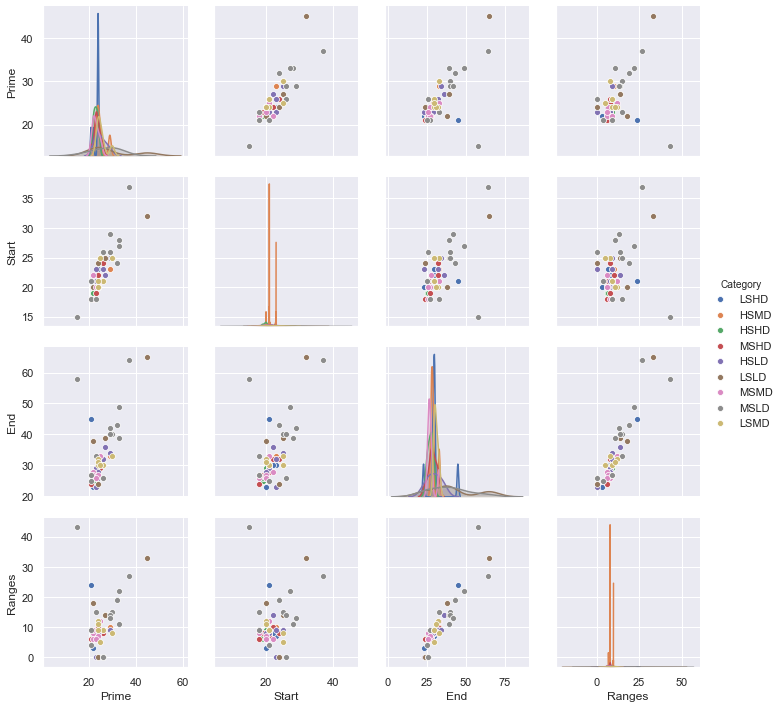

In [34]:
# Extract the Features from the Data
X = pd.DataFrame(maleagesdf[["Prime", "Start", "End", "Ranges", "Category"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X, hue = "Category")

### Boxplots for all four features for each of the 9 categories:

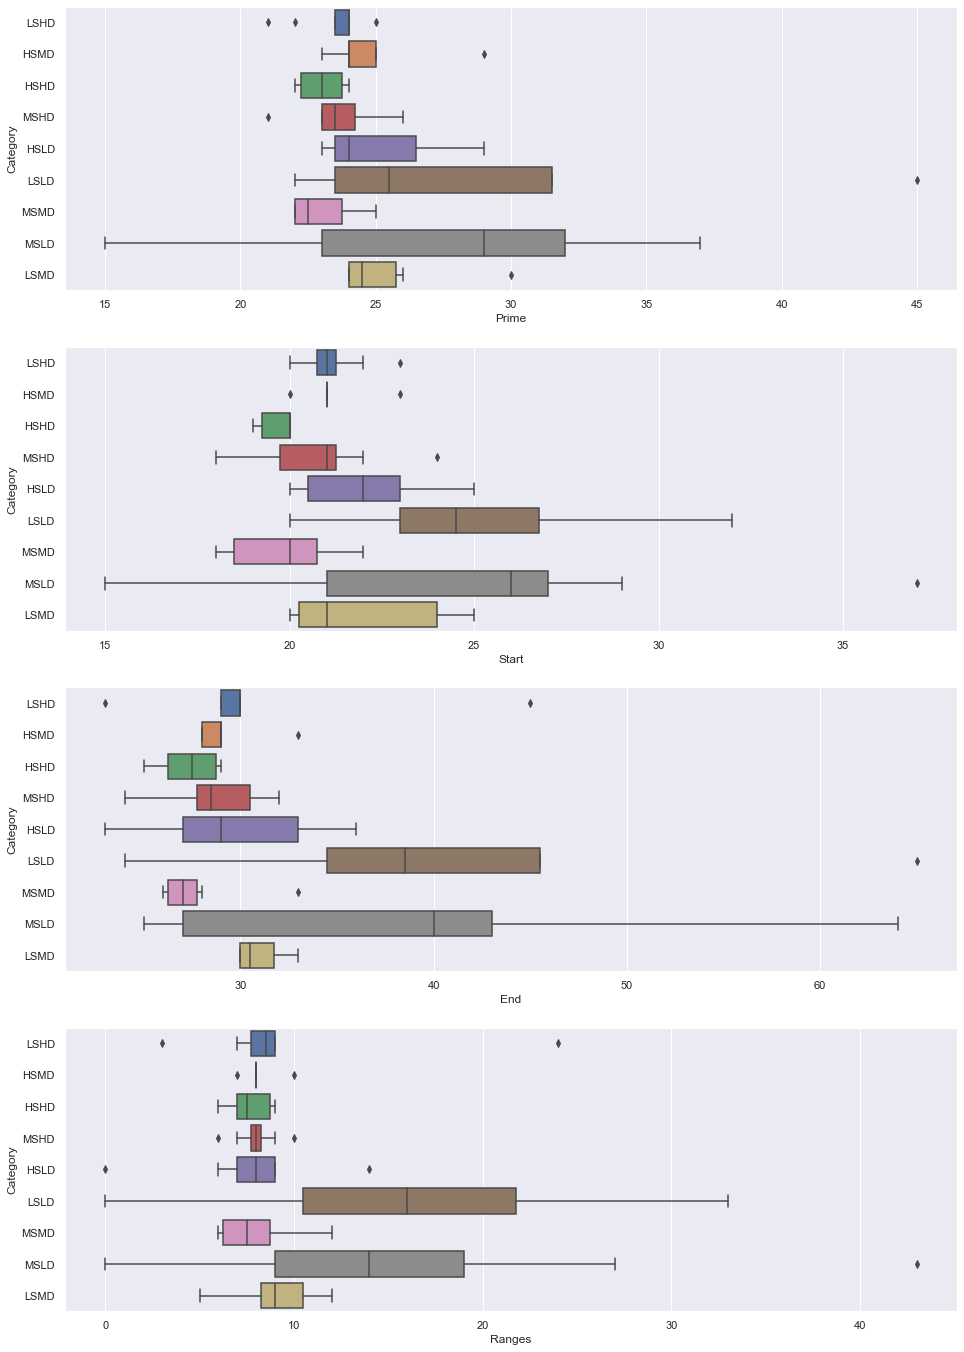

In [35]:
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = 'Prime', y = 'Category', data = maleagesdf, ax = axes[0])
sb.boxplot(x = 'Start', y = 'Category', data = maleagesdf, ax = axes[1])
sb.boxplot(x = 'End', y = 'Category', data = maleagesdf, ax = axes[2])
sb.boxplot(x = 'Ranges', y = 'Category', data = maleagesdf, ax = axes[3])

### Applying K-Means algorithm on Male Dataset:

K-Means was used to obtain a general overview of how sports can be clustered using the 4 variables without directly finding outliers/anomalies.


### Elbow Plot to find optimal number of clusters for K-Means:

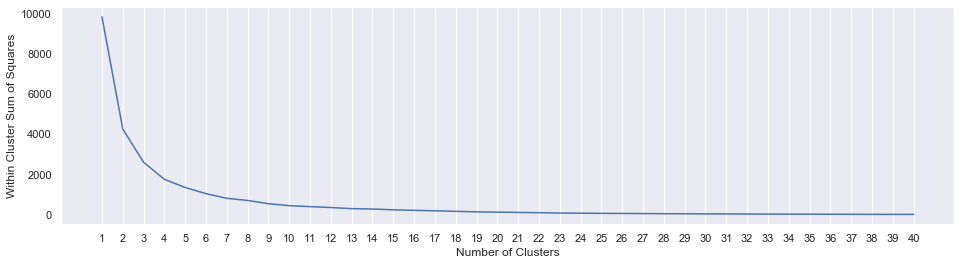

In [36]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

X = pd.DataFrame(maleagesdf[["Prime", "Start", "End", "Ranges"]]) 
# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### The number of clusters was decided to be 5 as there is an elbow on the curve at this point, and as 5 clusters seemed suitable for Olympic Sports (5 is not too low, not too high).

#### K-Means algorithm was applied with 5 clusters:

In [37]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 5
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### The cluster centers were printed out and a count-plot for the clusters was produced:

Features 	Prime 	Start 	End 	Ranges

Cluster 0:	23.0	20.54	26.29	5.75	
Cluster 1:	41.0	34.5	64.5	30.0	
Cluster 2:	28.3	24.7	41.1	16.4	
Cluster 3:	15.0	15.0	58.0	43.0	
Cluster 4:	24.92	21.58	30.65	9.08	

Within Cluster Sum of Squares : 1321.8397435897436



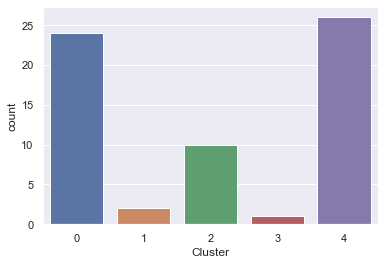

In [38]:
# Print the Cluster Centers
print("Features", "\tPrime", "\tStart", "\tEnd", "\tRanges")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

### 4D Pair-Plot for Sports Clustered by K-Means for Male Dataset:

C:\Users\lowbe\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lowbe\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


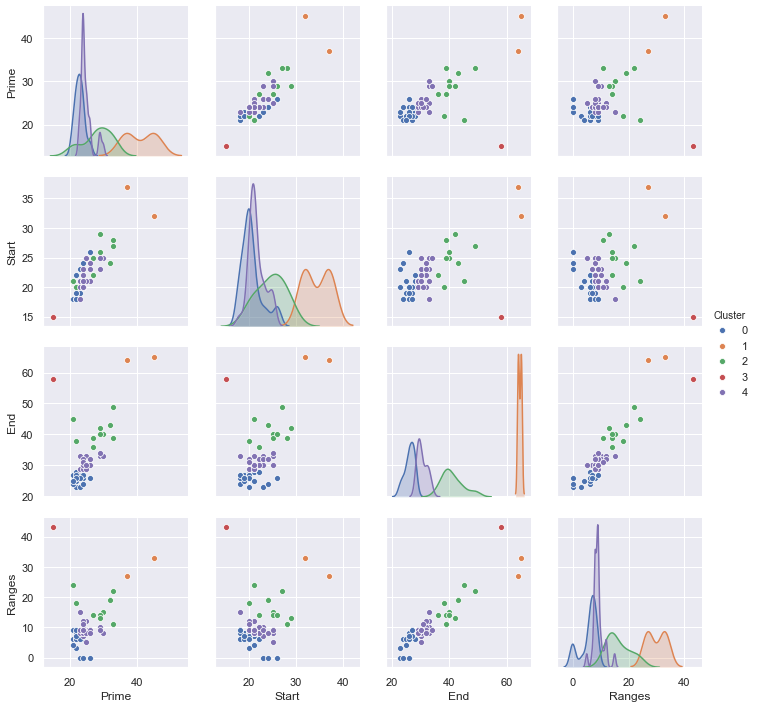

In [39]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

### Boxplots for all four features for each of the 5 clusters:

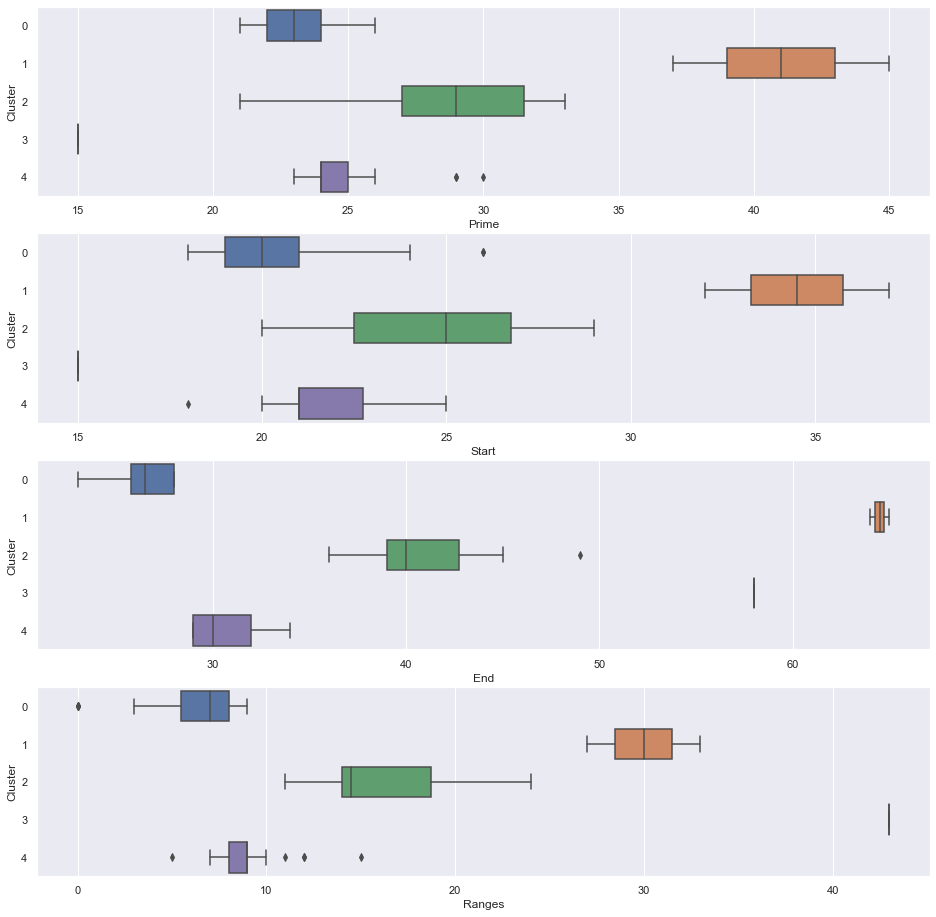

In [40]:
f, axes = plt.subplots(4, 1, figsize=(16,16))
sb.boxplot(x = 'Prime', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Start', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'End', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Ranges', y = 'Cluster', data = X_labeled, ax = axes[3])

[Back to Top.](#TOC)

<a id = '4.2'> </a>

## <center> 4.2 Pair Plot and K-Means on Categories of Sports (female)

### 4D Pair-Plot of Start, End, Prime and Ranges for Female Dataset

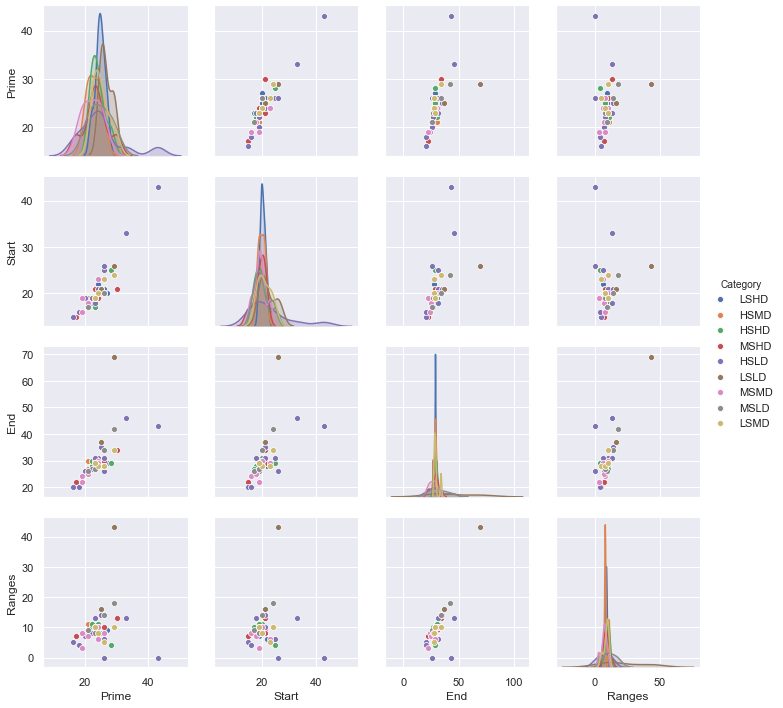

In [41]:
# Extract the Features from the Data
X = pd.DataFrame(femaleagesdf[["Prime", "Start", "End", "Ranges", "Category"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X, hue = 'Category')

### Applying K-Means on Female Dataset:

### Elbow Plot and find optimal number of clusters

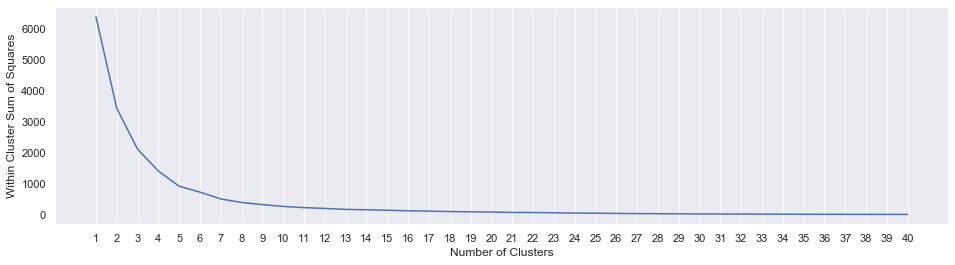

In [42]:
X = pd.DataFrame(femaleagesdf[["Prime", "Start", "End", "Ranges"]]) 
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### The number of clusters was decided to be 5 as there is an elbow on the curve at this point, and as 5 clusters seemed suitable for Olympic Sports (5 is not too low, not too high).


In [43]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 5
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### The number of clusters was decided to be 5 as there is an elbow on the curve at this point, and as 5 clusters seemed suitable for Olympic Sports (5 is not too low, not too high).

#### The cluster centers were printed out and a count-plot for the clusters was produced:

Features 	Prime 	Start 	End 	Ranges

Cluster 0:	19.11	17.0	23.33	6.33	
Cluster 1:	38.0	38.0	44.5	6.5	
Cluster 2:	27.33	21.83	36.0	14.17	
Cluster 3:	24.11	20.46	28.86	8.4	
Cluster 4:	29.0	26.0	69.0	43.0	

Within Cluster Sum of Squares : 911.8031746031745



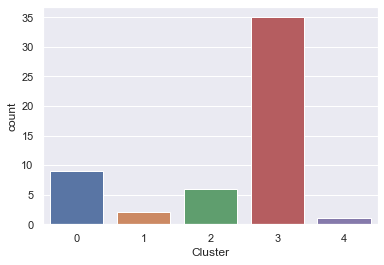

In [44]:
# Print the Cluster Centers
print("Features", "\tPrime", "\tStart", "\tEnd", "\tRanges")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])


### 4D Pair-Plot for Sports Clustered by K-Means for Female Dataset:

C:\Users\lowbe\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lowbe\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


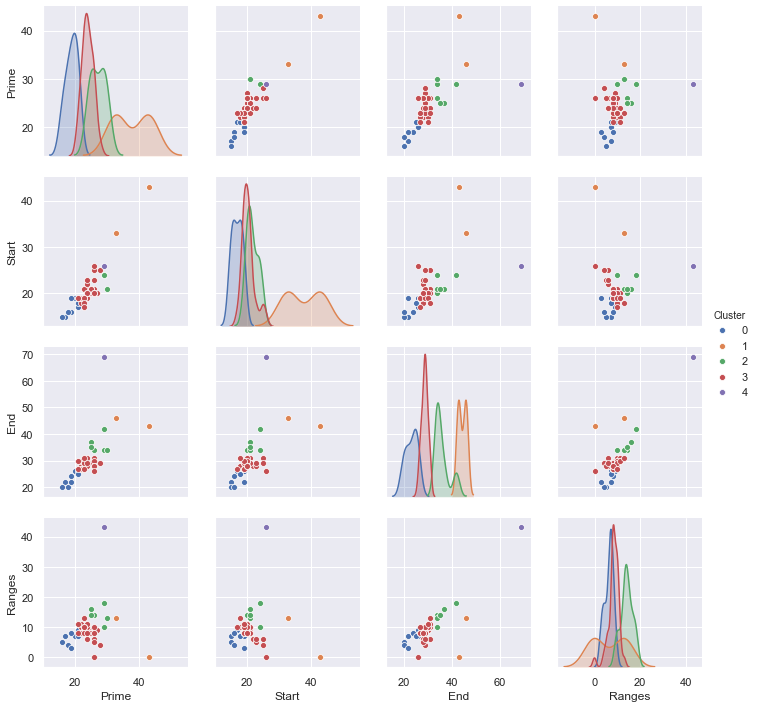

In [45]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

### Boxplots for all four features for each of the 5 clusters:

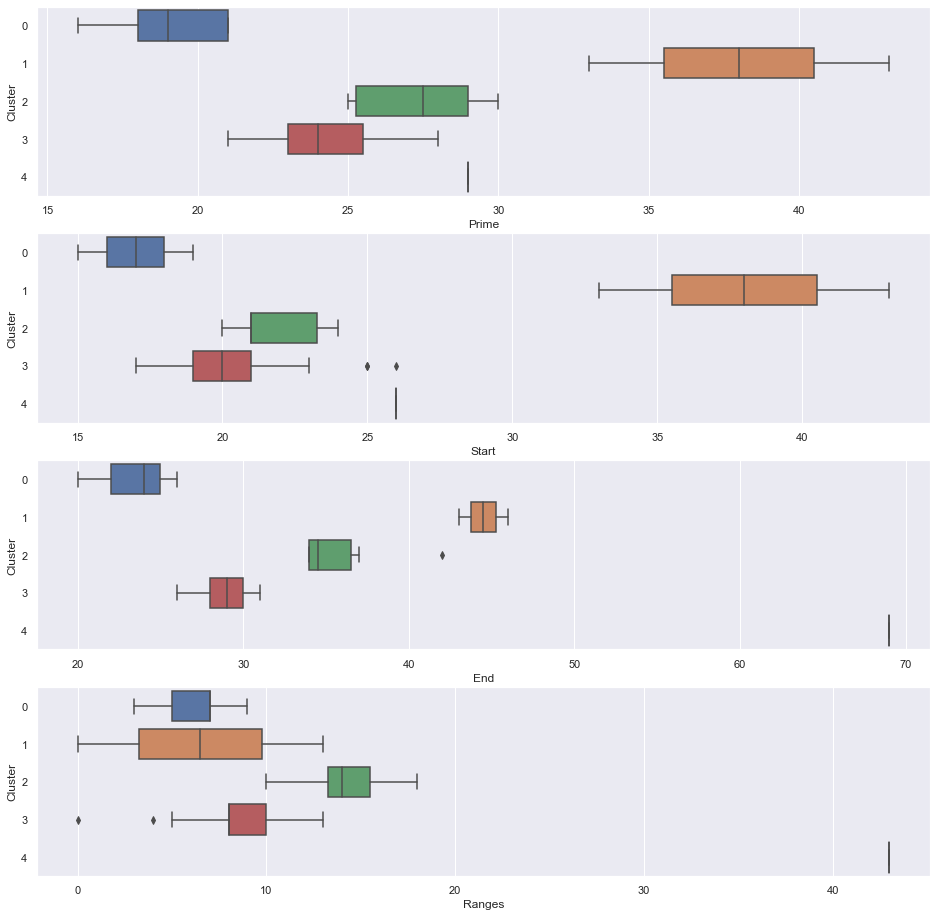

In [46]:
f, axes = plt.subplots(4, 1, figsize=(16,16))
sb.boxplot(x = 'Prime', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Start', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'End', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Ranges', y = 'Cluster', data = X_labeled, ax = axes[3])

[Back to Top.](#TOC)

<a id = '5'> </a>

# <center> DBSCAN

Density Based Spatial Clustering of Applications with Noise (DBSCAN) is generally better and more advanced than K-Means For DBSCAN, number of clusters is not specified, though 2 other values are: epsilon or eps (max distance between points) and minPoints. DBSCAN puts closely packed points in a single cluster, and points in low-density areas are marked as outliers.

DBSCAN algorithm was imported from Sci-Kit Learn: 

In [47]:
from pylab import rcParams
from sklearn.cluster import DBSCAN
from collections import Counter

[Back to Top.](#TOC)

<a id = '5.1'> </a>

## <center> 5.1 DBSCAN Clustering Algorithm (male)


### Epsilon (eps) = 2.5 and min_samples = 2

These values were chosen to make sure that there are enough clusters and also a relatively small number of anomalies.

Note: the cluster labelled "-1" is not actually a cluster, but represents all the anomalies.

In [48]:
df = maleagesdf
data = pd.DataFrame(df[["Prime", "Start", "End", "Ranges"]]) 

DBSCAN(algorithm='auto', eps=2.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)


C:\Users\lowbe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lowbe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


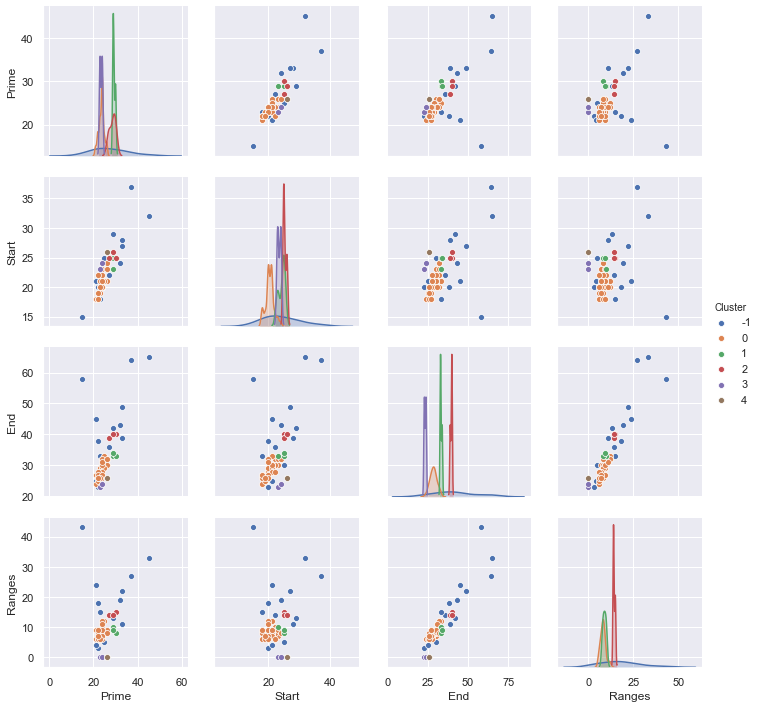

In [49]:
model = DBSCAN(eps = 2.5, min_samples = 2).fit(data)
print(model)

data_labeled = data.copy()
data_labeled["Cluster"] = pd.Categorical(model.labels_)


# Plot the Clusters on 2D grids
#sb.pairplot(data_labeled, vars = data.columns.values, hue = "Cluster", palette = sb.color_palette(palette= ("r", "b", "orange", "g", "r", "m"), n_colors=None, desat=None))
sb.pairplot(data_labeled, vars = data.columns.values, hue = "Cluster")

#### The code below indicates how many points are marked outliers (counter - "-1: 14" indicates there are 14 anomalies) and it shows the distribution of the points in the clusters.

In [50]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({0: 39, -1: 14, 1: 3, 2: 3, 3: 2, 4: 2})
    Prime  Start  End  Ranges
2      22     20   23       3
10     27     22   36      14
13     45     32   65      33
25     32     24   43      19
34     22     20   38      18
35     23     18   33      15
51     25     25   30       5
52     33     28   39      11
54     21     21   45      24
56     21     21   25       4
57     15     15   58      43
58     29     29   42      13
59     37     37   64      27
60     33     27   49      22


[Back to Top.](#TOC)

<a id = '5.2'> </a>

## <center> 5.2 DBSCAN Clustering Algorithm (female)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)


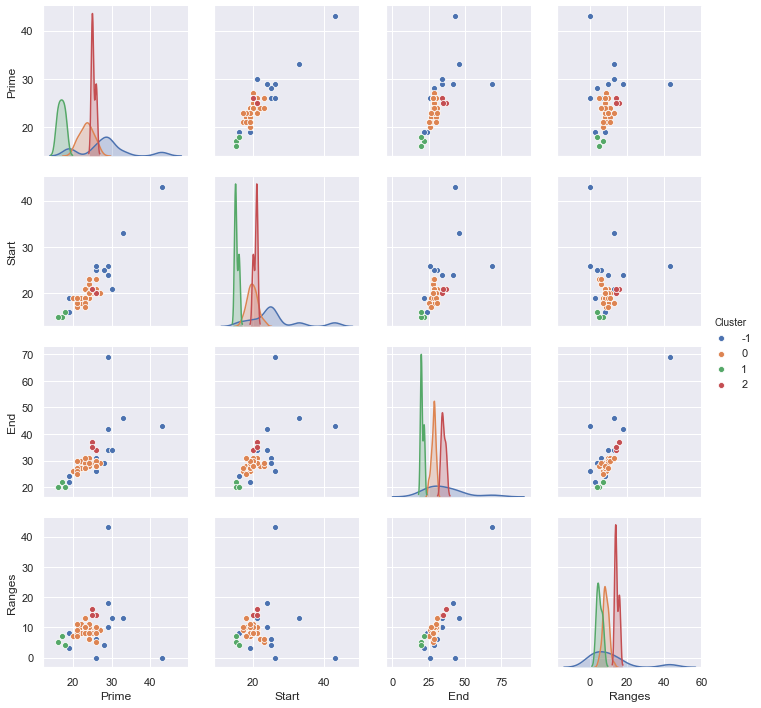

In [51]:
df = femaleagesdf

data = pd.DataFrame(df[["Prime", "Start", "End", "Ranges"]]) 

model = DBSCAN(eps = 3, min_samples = 2).fit(data)
print(model)

data_labeled = data.copy()
data_labeled["Cluster"] = pd.Categorical(model.labels_)


# Plot the Clusters on 2D grids
#sb.pairplot(data_labeled, vars = data.columns.values, hue = "Cluster", palette = sb.color_palette(palette= ("r", "b", "orange", "g", "r", "m"), n_colors=None, desat=None))
sb.pairplot(data_labeled, vars = data.columns.values, hue = "Cluster")

In [52]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({0: 36, -1: 11, 1: 3, 2: 3})
    Prime  Start  End  Ranges
12     29     26   69      43
21     26     25   31       6
23     29     24   42      18
25     28     25   29       4
32     19     16   24       8
43     29     24   34      10
44     30     21   34      13
45     19     19   22       3
50     26     26   26       0
51     33     33   46      13
52     43     43   43       0


#### The counter showed that there were 11 anomalies.

[Back to Top.](#TOC)

<a id = '6'> </a>

# <center> Findings and Comparison

<a id = '6.1'> </a>

## <center> 6.1 Comparison of Plots - Results of Clustering

All of the following plots are meant for comparing the Categorized Plots and the Clustered plots for the datasets (male and female). The idea was to recognize categories of sports that best match the clusters, so that we could answer some useful questions.

### For Male Dataset:
<img src="Comparison1.png">


Orange/Green clusters are clearly outliers.


Thus, Red cluster points have the highest range, which best matches the MSLD (grey) and LSLD (brown) categories, or generally Low Dynamic sports. These are the most sustainable sports.


Blue and Purple clusters have low start and prime ages, which best match the MSMD (pink) and LSMD (yellow) categories, or generally Moderately Dynamic sports. These sports are most suitable for young aspiring athletes.


<img src="Comparison2.png">

Orange cluster is the main cluster, and it best matches MSMD (pink) and LSMD (yellow) categories.


We can also note that several MSLD (grey) category sports are marked as outliers (cluster -1) as they have a wide range of values for prime, start, and end ages.


However, MSLD sports still have the highest range values relative to other categories, so MSLD is still the most sustainable category of sports.

[Back to Top.](#TOC)
<a id = '6.2'> </a>

## <center> 6.2 Answers to Main Questions and More Questions

### 1) What is the Most Sustainable Category of Olympic Sports?

#### Answer: MSLD category, as it has the highest range. It includes sports such as archery, diving, and shooting.

Young aspiring athletes who want to win at least one medal in the Olympics would look for categories with low start and prime ages, and large range...

### 2) What are categories of sports that a young aspiring athlete could consider?

#### Answer: MSMD and LSMD (moderately dynamic) sports, such as tennis and fencing.

Older athletes may want to compete in the Olympics. They would look for high prime ages and large range to maximize their chances of winning medals.

### 3) What are categories of sports that an older athlete could consider?

#### Answer: MSLD and LSLD categories. While, LSLD may not have the most sustainable sports, some LSLD sports have high prime ages, like golf and croquet, that are better suited to older Olympians.


### For Female Dataset:
<img src="Comparison3.png">


<img src="Comparison4.png">

For both comparisons for the female dataset, we had difficulty matching clusters and categories of sports, and so, we decided to investigate why this was the case.

[Back to Top.](#TOC)

<a id = '6.3'> </a>

## <center> 6.3 Female Data Lacking - More Questions to be Asked?

### We found that the female datasets are a little 'off'

#### Every cluster is almost entirely made up of several category of sports! Perhaps we should find out why 

## Female Discrepancies
#### This is our male bar charts code
#### We create seperate dictionaries of all 9 categories of male athletes
#### Each dictionary has the key value pair of 'Sport' : 'Years of Participation'

In [53]:
sport = pd.DataFrame(olympicdata[["Sex", "Sport", "Year"]])
guysport = sport.loc[sport["Sex"] == "M"]
SportYear = {}
u = 0
for x in maleagesdf["Sport"].unique():
    lame = guysport.loc[guysport["Sport"] == x]
    for y in lame["Year"].unique():
        u = u + 1
    SportYear[x] = u
    u = 0
HSHDm, HSMDm, HSLDm, MSHDm, MSMDm, MSLDm, LSHDm, LSMDm, LSLDm ={},{},{},{},{},{},{},{},{}

for x in SportYear.keys():
    for y in HSHD.keys():
        if x == y:
            HSHDm[y] = SportYear[x]
    for y in HSMD.keys():
        if x == y:
            HSMDm[y] = SportYear[x]
    for y in HSLD.keys():
        if x == y:
            HSLDm[y] = SportYear[x]
    for y in MSHD.keys():
        if x == y:
            MSHDm[y] = SportYear[x]
    for y in MSMD.keys():
        if x == y:
            MSMDm[y] = SportYear[x]
    for y in MSLD.keys():
        if x == y:
            MSLDm[y] = SportYear[x]
    for y in LSHD.keys():
        if x == y:
            LSHDm[y] = SportYear[x] 
    for y in LSMD.keys():
        if x == y:
            LSMDm[y] = SportYear[x] 
    for y in LSLD.keys():
        if x == y:
            LSLDm[y] = SportYear[x] 

### This is the female bar charts
#### We create 9 seperate dictionaries of all 9 categories of female athletes
#### Each dictionary has the key value pair of 'Sport' : 'Years of Participation'

In [54]:
sport = pd.DataFrame(olympicdata[["Sex", "Sport", "Year"]])
girlsport = sport.loc[sport["Sex"] == "F"]
sample = {}
u = 0
for x in femaleagesdf["Sport"].unique():
    lame = girlsport.loc[girlsport["Sport"] == x]
    for y in lame["Year"].unique():
        u = u + 1
    sample[x] = u
    u = 0
    
HSHDw,HSMDw,HSLDw,MSHDw,MSMDw,MSLDw,LSHDw,LSMDw,LSLDw = {},{},{},{},{},{},{},{},{}
for x in sample.keys():
    for y in HSHD.keys():
        if x == y:
            HSHDw[y] = sample[x]
    for y in HSMD.keys():
        if x == y:
            HSMDw[y] = sample[x]
    for y in HSLD.keys():
        if x == y:
            HSLDw[y] = sample[x]
    for y in MSHD.keys():
        if x == y:
            MSHDw[y] = sample[x]
    for y in MSMD.keys():
        if x == y:
            MSMDw[y] = sample[x]
    for y in MSLD.keys():
        if x == y:
            MSLDw[y] = sample[x]
    for y in LSHD.keys():
        if x == y:
            LSHDw[y] = sample[x] 
    for y in LSMD.keys():
        if x == y:
            LSMDw[y] = sample[x] 
    for y in LSLD.keys():
        if x == y:
            LSLDw[y] = sample[x] 

[Back to Top.](#TOC)

<a id = '6.4'> </a>

## <center> 6.4 Data Visualization for Female Participation in the Olympics

### Bar Chart Comparison of Male vs Female

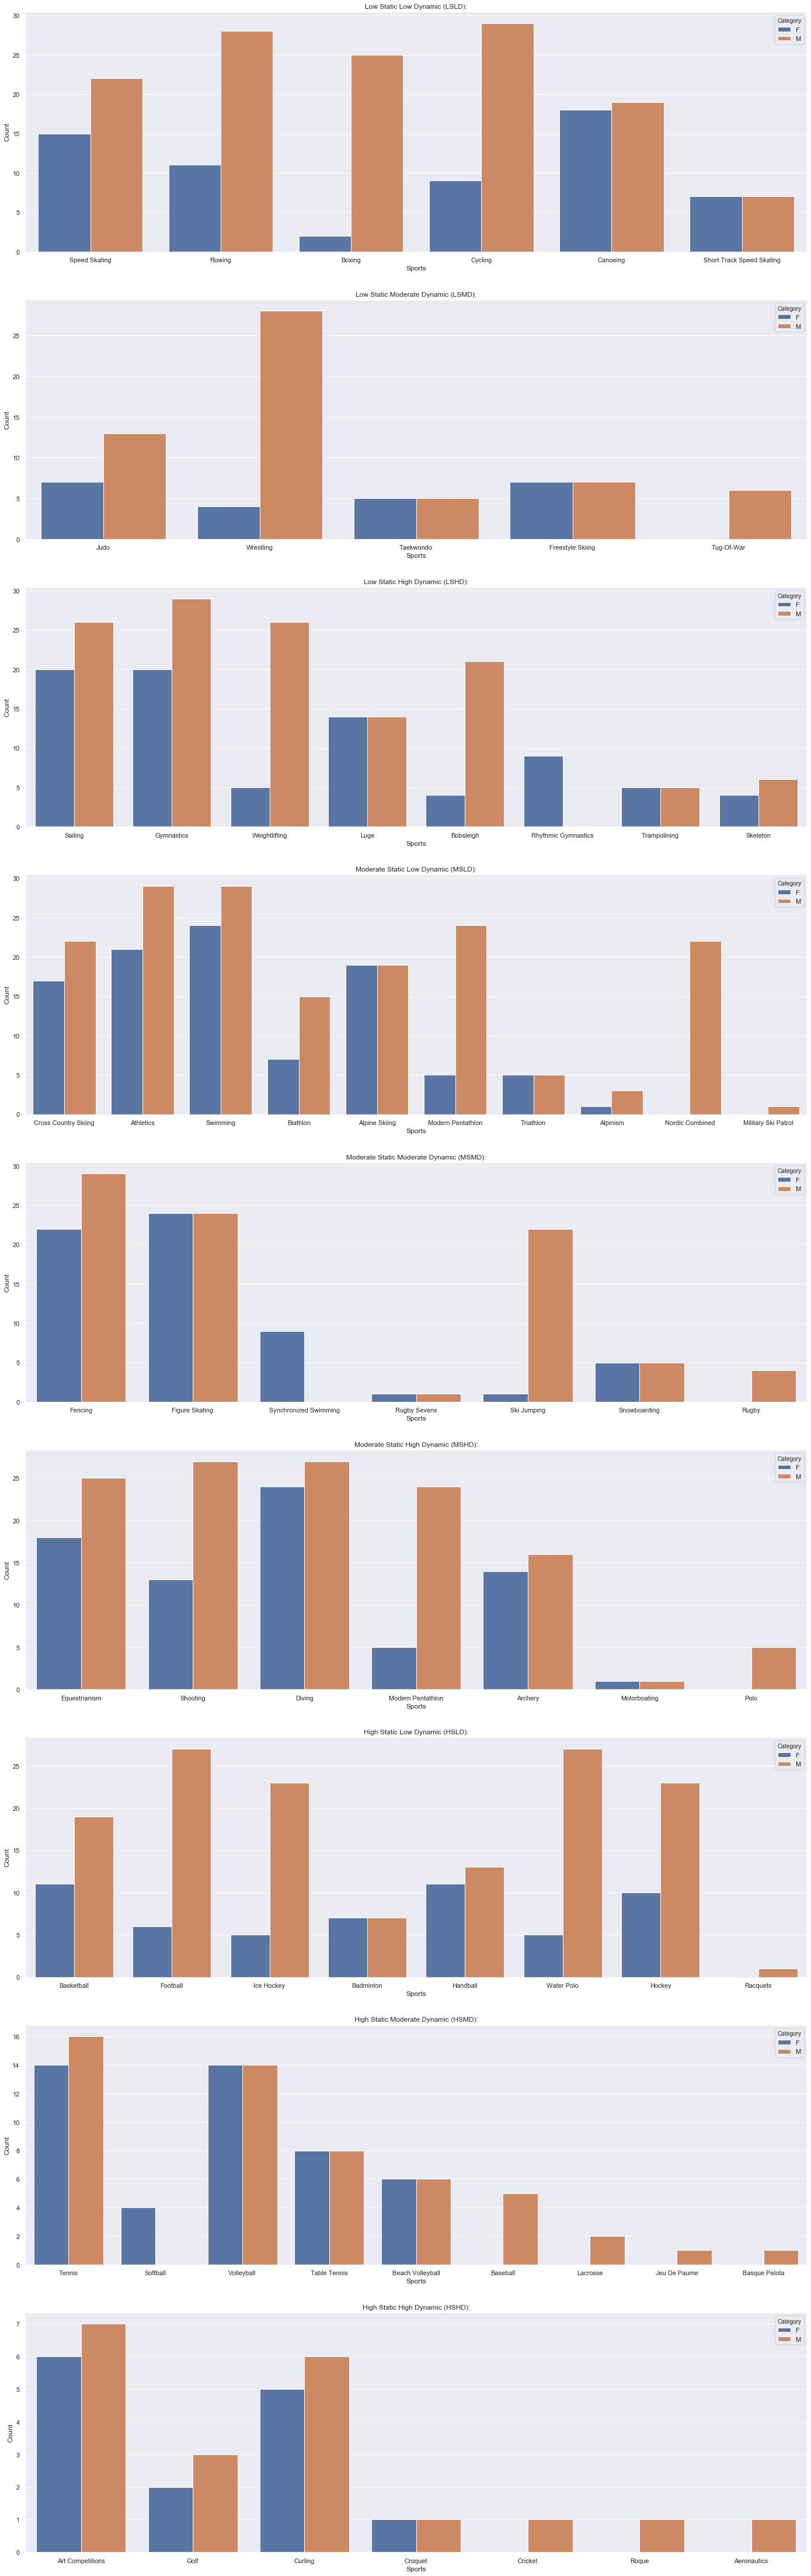

In [55]:
newlist = []
dfHSHD, dfHSMD, dfHSLD, dfMSHD, dfMSMD, dfMSLD, dfLSHD, dfLSMD, dfLSLD = [],[],[],[],[],[],[],[],[]
dataframe = [dfHSHD, dfHSMD, dfHSLD, dfMSHD, dfMSMD, dfMSLD, dfLSHD, dfLSMD, dfLSLD]
dataframecomplete = []
f = 0
d = 0
for x in [HSHDw, HSMDw, HSLDw, MSHDw, MSMDw, MSLDw, LSHDw, LSMDw, LSLDw]:
    for y in x.keys():
        dataframe[f].append([y, x[y], "F"])
    f = f + 1
f = 0
for x in [HSHDm, HSMDm, HSLDm, MSHDm, MSMDm, MSLDm, LSHDm, LSMDm, LSLDm]:
    for y in x.keys():
        dataframe[f].append([y, x[y], "M"])
    f = f + 1
f, axes = plt.subplots(9,1, figsize = (24,80))
for u in dataframe:
    crap = pd.DataFrame(u,columns = ["Sports", "Count", "Category"])
    dataframecomplete.append(crap)
    ax = sb.barplot(x = "Sports", y = "Count", hue = "Category", data = crap, ax = axes[d]).set_title(headertuple[d])
    d = d + 1

#### Next, obtain a male only dataframe with total participants per year, time series
#### Repeat for Female of course

In [56]:
someflist = []
somemlist = []
for x in girlsport["Year"].unique():
    lol = girlsport.loc[girlsport["Year"] == x]
    someflist.append([x, len(lol.index)])
print("--------------")
femalepart = pd.DataFrame(someflist, columns = ["year", "Participants"])
for x in guysport["Year"].unique():
    lol = guysport.loc[guysport["Year"] == x] 
    somemlist.append([x,len(lol.index)])
malepart = pd.DataFrame(somemlist, columns = ["year", "Participants"] )
malepart.sort_values(by = ["year"], ascending=True, inplace=True)
malepart = malepart.reset_index(drop=True)

--------------


In [57]:
femalepart = femalepart.append({"year" : 1896, "Participants" : 0}, ignore_index=True)
femalepart = femalepart.sort_values(by = ["year"], ascending=True)
femalepart = femalepart.reset_index(drop=True)

#### We calculated the percentage participation of female against the both genders in total, by merging and doing arithmetic addition and division on columns
#### Then, add a new column called "Percentage Participation" into both male and female dataframes

In [58]:
femalepart["sum"] = femalepart["Participants"] + malepart["Participants"]
femalepart["percent part"] = round(100 * (femalepart["Participants"] / femalepart["sum"]), 2)

In [59]:
malepart["sum"] = femalepart["Participants"] + malepart["Participants"]
malepart["percent part"] = round(100 * (malepart["Participants"] / malepart["sum"]), 2)

### Lineplot of Trend
#### We want to view the general trend of female participation, to look at the change in % participation of the two sexes

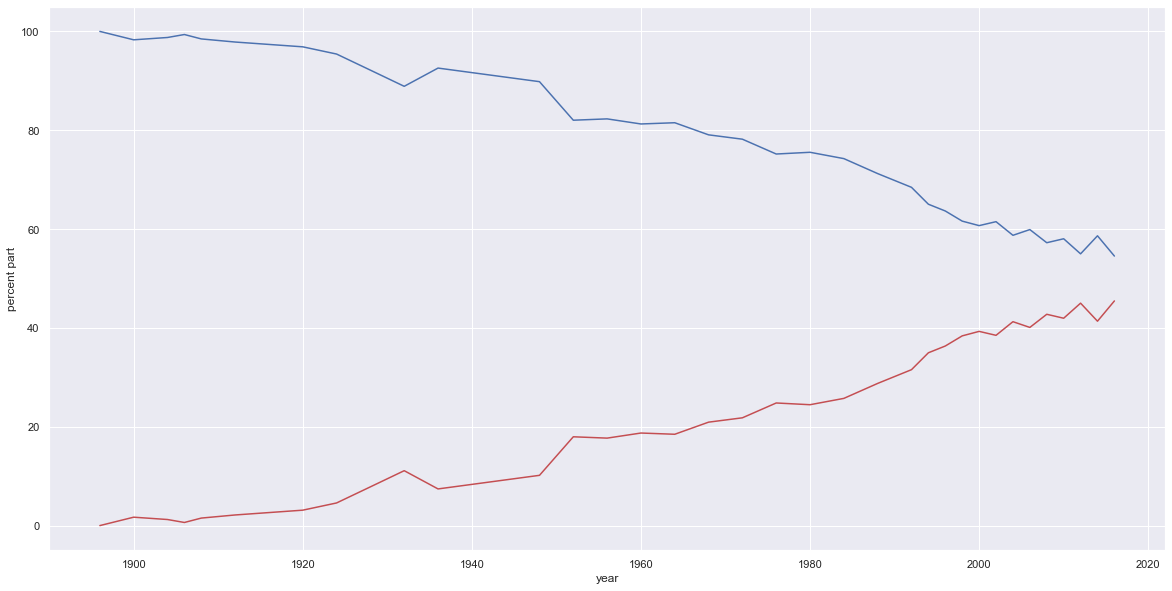

In [60]:
f, axes = plt.subplots(1,1, figsize = (20,10))
sb.lineplot(x = "year", y = "percent part", data = femalepart, color = "r")
sb.lineplot(x = "year", y = "percent part", data = malepart, color = "b")

<img src="outro2.png">

[Back to Top.](#TOC)

<a id = '6.5'> </a>

## <center> 6.5 What is the reason for the poor Olympics Participation for Females?

Naturally this was what our findings led us to. Well, we left this to Google and found out it was none other than the usual culprit - Discrimination. 

Females weren't thought to be athletic enough; or to quote Pierre de Coubertin (founder of International Olympics Committee (IOC)), females were "not cut out to sustain certain shocks".

"Reality Check: Do the Olympics have a gender gap?", BBC News, 2019. [Online]. Available: https://www.bbc.com/news/world-41272613. [Accessed: 23- Apr- 2019].

[Back to Top.](#TOC)

<a id = '7'> </a>

# <center> Conclusion and Final Findings

We started by formulating our question and decided to ask "What is the most sustainable category of sport?".

We analyzed the data and explored it. Afterwhich, we used what information was given to us to adapt and shape to what we want. Eventually we derived the data we required for our Data Science and Machine Learning.

Afterwhich, we did K-Means as well as DBSCAN clustering algorithms. Comparing these to our own pair plots we answered our question - low dynamic sports tended to be the most sustainable.

However, it wasn't hard long before we realized something was wrong with the female data sets as it was disastrously erratic for its clustering. We had to ask more questions.

Exploring the data, we found out their participation was extremely low and gradual to the Olympics. This only raised more questions. 

#### Through the project we've learnt more than data science techniques. Ultimately we learnt to ask questions - and never stop asking. There's always something more than the apparent data we have at hand and it's up to us to ask the right questions.

[Back to Top.](#TOC)